In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cell_df=pd.read_csv("C:/Users/rohan/Desktop/Classification/cell_samples1.csv")
cell_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
cell_df.shape

(699, 11)

In [5]:
cell_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID             699 non-null int64
Clump          699 non-null int64
UnifSize       699 non-null int64
UnifShape      699 non-null int64
MargAdh        699 non-null int64
SingEpiSize    699 non-null int64
BareNuc        699 non-null object
BlandChrom     699 non-null int64
NormNucl       699 non-null int64
Mit            699 non-null int64
Class          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [6]:
cell_df.describe(include='all')

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699,699.000000,699.000000,699.000000,699.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,402,NaN,NaN,NaN,NaN
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,NaN,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,NaN,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,NaN,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,NaN,5.000000,4.000000,1.000000,4.000000


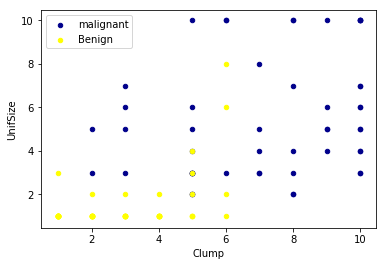

In [8]:
ax=cell_df[cell_df['Class']==4][0:50].plot(kind='scatter',x='Clump',y='UnifSize',color='DarkBlue',label='malignant')
cell_df[cell_df['Class']==2][0:50].plot(kind='scatter',x='Clump',y='UnifSize',color='yellow',label='Benign',ax=ax)

In [10]:
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [11]:
cell_df=cell_df[pd.to_numeric(cell_df['BareNuc'],errors='coerce').notnull()]
cell_df['BareNuc']=cell_df['BareNuc'].astype('int')
cell_df.dtypes

C:\Users\rohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [12]:
feature_df=cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X=np.asarray(feature_df)
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [13]:
cell_df['Class']=cell_df['Class'].astype('int')
y=np.asarray(cell_df['Class'])
y[0:5]

C:\Users\rohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


array([2, 2, 2, 2, 2])

In [15]:
cell_df['Class']=cell_df['Class'].astype('int')
y=np.asarray(cell_df['Class'])
y[0:5]

Test set: (409, 9) (409,)
train set: (274, 9) (274,)


In [16]:
from sklearn import svm
clf=svm.SVC(kernel='rbf')
clf.fit(X_train,y_train)

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [17]:
yhat=clf.predict(X_test)
yhat[0:5]

array([2, 4, 2, 4, 2])

In [19]:
from sklearn.metrics import classification_report,confusion_matrix
import itertools

In [22]:
def plot_confusion_matrix(cm,classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print("normalized confusion matrix")
    else:
        print('Confusion matrix,without normalization')
    print(cm)
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    
    fmt='.2f' if normalize else 'd'
    thresh =cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),
                horizontalalignment='center',
                color='white' if cm[i,j]>thresh else "black")
        plt.tight_layout()
        plt.ylabel('true label')
        plt.xlabel('predicted label')
        
        

              precision    recall  f1-score   support

           2       0.99      0.91      0.95       175
           4       0.87      0.98      0.92        99

   micro avg       0.94      0.94      0.94       274
   macro avg       0.93      0.95      0.93       274
weighted avg       0.94      0.94      0.94       274

Confusion matrix,without normalization
[[160  15]
 [  2  97]]


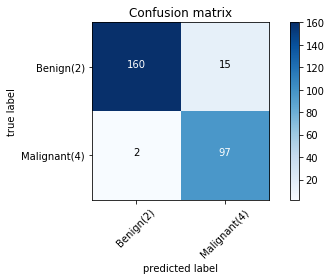

In [23]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

In [24]:
from sklearn.metrics import f1_score
f1_score(y_test,yhat,average='weighted')

0.9386708157204025

In [27]:
from sklearn.metrics  import jaccard_similarity_score
jaccard_similarity_score(y_test,yhat)

0.9379562043795621

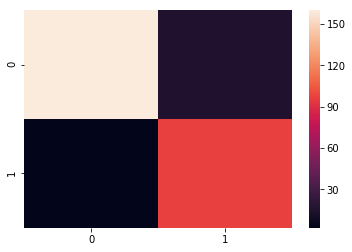

In [33]:
import seaborn as sns
f=cnf_matrix
sns.heatmap(f)